In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import prep_season
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

Prep_Season.py Loaded Successfully


In [2]:
df = prep_season.clean_season()

Dataframe Ready For Use


In [3]:
df

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,displayName,jerseyNumber,position,frameId,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.00,Matt Ryan,2.00,QB,52,2018090600,75,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,9.09,0,0
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.00,Matt Ryan,2.00,QB,48,2018090600,146,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.00,Matt Ryan,2.00,QB,47,2018090600,168,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.00,Matt Ryan,2.00,QB,62,2018090600,190,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.09,24.42,0,0
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.00,Matt Ryan,2.00,QB,46,2018090600,256,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,20.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238414,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3534,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,26.29,1,0
238415,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3603,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.11,12.90,1,0
238416,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,2552576.00,Sean Mannion,14.00,QB,52,2018123014,4088,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,33.72,1,0
238417,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.00,Darious Williams,31.00,CB,42,2018123014,4181,0,NONE,17,69,187,1993-03-15,Alabama-Birmingham,25.00,0.10,42.80,1,1


In [4]:
df['force_per_second'] = (((df.weight * 0.45359237)/ (9.8)) * (df.s / 1.094)).round(2)

In [5]:
df['uniqueId'] = (df.gameId.astype(str) + df.playId.astype(str)).astype(int)

In [6]:
df.head()

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,displayName,jerseyNumber,position,frameId,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense,uniqueId
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.00,Matt Ryan,2.00,QB,52,2018090600,75,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,9.09,0,0,201809060075
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.00,Matt Ryan,2.00,QB,48,2018090600,146,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0,2018090600146
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.00,Matt Ryan,2.00,QB,47,2018090600,168,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0,2018090600168
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.00,Matt Ryan,2.00,QB,62,2018090600,190,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.09,24.42,0,0,2018090600190
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.00,Matt Ryan,2.00,QB,46,2018090600,256,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,20.11,0,0,2018090600256


In [7]:
import prep_plays

Acquire.py Loaded Successfully
Prep.py Loaded Successfully


In [8]:
df2 = prep_plays.prep_plays_data()

In [9]:
df2['uniqueId'] = (df2.gameId.astype(str) + df2.playId.astype(str)).astype(int)

In [10]:
df = pd.merge(df, df2, how='left', on='uniqueId')

In [11]:
df = df.drop(columns = {'playId_y', 'gameId_y', 'pass_stopped_y'})
df = df.rename(columns = {'gameId_x': 'gameId','playId_x': 'playId', 'pass_stopped_x': 'pass_stopped'})
df = df.dropna()

In [12]:
df3 = pd.read_csv('final.csv', index_col = [0])
df3['uniqueId'] = df3.playid.rename({'playid': 'uniqueId'})
df = pd.merge(df, df3, how='left', on='uniqueId')
df = df.drop(columns = {'week_y', 'playid', 'playDescription_y', 'quarter_y', 'down_y',
                        'yardsToGo_y', 'team_by_comp_yds_y', 'defendersInTheBox_y',
                        'numberOfPassRushers_y', 'QB_under_pressure_y', 'gameClock_y',
                        'absoluteYardlineNumber_y', 'epa_y', 'pass_stopped_y', 'playResult_y',
                        'RB_y', 'TE_y', 'WR_y', 'DL_y', 'LB_y', 'DB_y', 'EMPTY_y', 'I_FORM_y',
                        'JUMBO_y', 'PISTOL_y', 'SHOTGUN_y', 'SINGLEBACK_y', 'WILDCAT_y',
                        'four_three_y', 'three_four_y', 'nickel_y', 'dime_y'})
df = df.rename(columns = {'week_x': 'week', 'playDescription_x': 'playDescription',
                          'quarter_x': 'quarter', 'down_x': 'down', 'yardsToGo_x': 'yardsToGo',
                          'team_by_comp_yds_x': 'team_by_comp_yds', 'defendersInTheBox_x': 'defendersInTheBox',
                          'numberOfPassRushers_x': 'numberOfPassRushers', 'QB_under_pressure_x': 'QB_under_pressure',
                          'gameClock_x': 'gameClock','absoluteYardlineNumber_x': 'absoluteYardlineNumber',
                          'epa_y': 'epa', 'pass_stopped_x': 'pass_stopped', 'playResult_x': 'playResult',
                          'RB_x': 'RB', 'TE_x': 'TE', 'WR_x': 'WR', 'DL_x': 'DL', 'LB_x': 'LB', 'DB_x': 'DB',
                          'EMPTY_y': 'EMPTY', 'I_FORM_x': 'I_FORM','JUMBO_x': 'JUMBO', 'PISTOL_x': 'PISTOL',
                          'SHOTGUN_x': 'SHOTGUN', 'SINGLEBACK_x': 'SINGLEBACK', 'WILDCAT_x': 'WILDCAT',
                          'four_three_x': 'four_three', 'three_four_x': 'three_four', 'nickel_x': 'nickel',
                          'dime_x': 'dime', 'pass_stopped_x': 'pass_stopped', 'epa_x': 'epa'})
df = df.dropna()


In [13]:
df.head()

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,displayName,jerseyNumber,position,frameId,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense,uniqueId,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y,defender_receiver
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.00,Matt Ryan,2.00,QB,52,2018090600,75,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,9.09,0,0,201809060075,(15:00) M.Ryan pass short right to J.Jones pus...,1.00,1.00,15.00,3.00,7.00,4.00,0.0,15:00:00,90.00,0.26,10.00,2,1,2,4.00,2.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,4.16,76.53,44.93,Jalen Mills
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.00,Matt Ryan,2.00,QB,48,2018090600,146,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0,2018090600146,(13:10) M.Ryan pass incomplete short right to ...,1.00,1.00,10.00,3.00,7.00,4.00,0.0,13:10:00,49.00,-0.37,0.00,1,1,3,4.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,4.24,46.18,41.10,Malcolm Jenkins
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.00,Matt Ryan,2.00,QB,47,2018090600,168,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0,2018090600168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1.00,2.00,10.00,3.00,6.00,4.00,0.0,13:05:00,49.00,-0.70,0.00,2,1,2,4.00,2.00,5.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.34,46.59,12.67,Sidney Jones
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.00,Matt Ryan,2.00,QB,62,2018090600,190,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.09,24.42,0,0,2018090600190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1.00,3.00,10.00,3.00,6.00,5.00,1.0,13:01:00,49.00,3.05,33.00,1,1,3,4.00,1.00,6.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,4.24,39.77,22.27,Malcolm Jenkins
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.00,Matt Ryan,2.00,QB,46,2018090600,256,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,20.11,0,0,2018090600256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1.00,3.00,1.00,3.00,8.00,6.00,0.0,10:59:00,11.00,-0.84,0.00,2,3,0,6.00,3.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.12,8.20,33.31,Nate Gerry


In [14]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

# split_scale
# import split_scale

# libraries needed for preparing the data:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing


##### This is the key function that returns 6 dataframes #####
def train_validate_test(df):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 30% of the entire dataframe, 
    a validate, which is 28% of the entire dataframe,
    and a train, which is 42% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (30%) and train_validate (70%)
    train_validate, test = train_test_split(df, test_size=.3, random_state=123, stratify = df.pass_stopped)

    # split train_validate off into train (60% of 70% = 42%) and validate (40% of 70% = 28%)
    train, validate = train_test_split(train_validate, test_size=.4, random_state=123, stratify = train_validate.pass_stopped)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])
    X_validate = validate.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])
    X_test = test.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])

    y_train = train[['pass_stopped']]
    y_validate = validate[['pass_stopped']]
    y_test = test[['pass_stopped']]
    return X_train, y_train, X_validate, y_validate, X_test, y_test


def min_max_scale(X_train, X_validate, X_test):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).
    X_train = X_train.drop(columns = {'collegeName', 'position', 'pass_stopped',
                                      'playDescription', 'uniqueId', 'gameClock',
                                     'playResult', 'defender_receiver'})
    X_validate = X_validate.drop(columns = {'collegeName', 'position', 'pass_stopped',
                                            'playDescription', 'uniqueId', 'gameClock',
                                           'playResult', 'defender_receiver'})
    X_test = X_test.drop(columns = {'collegeName', 'position', 'pass_stopped',
                                    'playDescription', 'uniqueId', 'gameClock',
                                   'playResult', 'defender_receiver'})
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
    X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [15]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df)

In [16]:
X_train.head()

,x,y,s,a,dis,o,dir,pass_stopped,position,playDirection,height,weight,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense,uniqueId,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y,defender_receiver
82272,35.19,14.26,3.45,0.49,0.35,38.74,39.99,1,WR,1,74,196,Alabama,24.00,0.10,28.61,0,0,2018120206419,(7:56) J.Allen pass incomplete deep right.,1.00,1.00,10.00,31.00,7.00,4.00,1.0,07:56:00,74.00,-0.53,0.00,1,1,3,4.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,unknown
108303,52.74,21.52,0.65,3.33,0.09,347.30,205.89,1,QB,0,77,245,Auburn,29.00,0.14,6.74,1,0,2018090910923,(14:13) (Shotgun) C.Newton pass incomplete sho...,2.00,3.00,10.00,15.00,6.00,6.00,0.0,14:13:00,63.00,-1.72,0.00,1,1,3,4.00,2.00,5.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,2.53,69.28,18.04,Anthony Brown
173805,62.74,1.09,1.05,1.75,0.11,326.53,247.34,1,WR,1,75,205,Georgia,25.00,0.10,9.11,1,0,20181111051885,(:42) (Shotgun) P.Mahomes pass incomplete shor...,2.00,3.00,11.00,4.00,6.00,3.00,1.0,00:42:00,74.00,-0.53,0.00,1,1,3,3.00,3.00,5.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,3.45,60.78,39.59,Bene' Benwikere
30278,82.76,35.94,4.32,4.76,0.45,148.20,352.61,0,WR,1,73,215,Southern California,21.00,0.10,39.30,0,0,20181104003392,(12:39) No. 5 - Joshua Dobbs in at QB for PIT....,4.00,2.00,20.00,2.00,6.00,4.00,0.0,12:39:00,105.00,2.71,22.00,1,1,3,1.00,4.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,4.55,91.38,22.58,C.J. Mosley
82080,67.66,25.36,1.17,2.22,0.11,0.30,170.77,0,OLB,0,75,244,Alabama,24.00,0.09,12.08,0,1,2018093012940,(2:17) (Shotgun) B.Roethlisberger pass short r...,1.00,2.00,7.00,2.00,6.00,4.00,0.0,02:17:00,73.00,0.77,8.00,1,1,3,2.00,4.00,5.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,3.77,80.58,17.91,Tavon Young


In [17]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test)

In [18]:
X_train_scaled

,x,y,s,a,dis,o,dir,playDirection,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y
82272,0.30,0.33,0.32,0.04,0.12,0.11,0.11,1.00,0.57,0.20,0.19,0.06,0.26,0.00,0.00,0.00,0.00,0.23,0.97,0.60,0.44,1.00,0.64,0.55,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
108303,0.44,0.43,0.06,0.27,0.03,0.96,0.57,0.00,0.79,0.46,0.43,0.09,0.06,1.00,0.00,0.25,0.67,0.23,0.45,0.50,0.67,0.00,0.53,0.50,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.58,0.33
173805,0.52,0.13,0.10,0.14,0.04,0.91,0.69,1.00,0.64,0.24,0.24,0.07,0.08,1.00,0.00,0.25,0.67,0.25,0.10,0.50,0.33,1.00,0.64,0.55,0.25,0.25,0.60,0.50,0.50,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.51,0.73
30278,0.68,0.64,0.40,0.38,0.15,0.41,0.98,1.00,0.50,0.30,0.05,0.07,0.36,0.00,0.00,0.75,0.33,0.47,0.03,0.50,0.44,0.00,0.96,0.71,0.25,0.25,0.60,0.17,0.67,0.71,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.05,0.76,0.42
82080,0.56,0.49,0.11,0.18,0.04,0.00,0.47,0.00,0.64,0.45,0.19,0.06,0.11,0.00,1.00,0.00,0.33,0.15,0.03,0.50,0.44,0.00,0.63,0.62,0.25,0.25,0.60,0.33,0.67,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,0.67,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214610,0.27,0.42,0.51,0.20,0.19,0.10,0.98,1.00,0.21,0.11,0.24,0.06,0.40,0.00,0.00,0.75,0.33,0.23,0.45,0.30,0.44,0.00,0.29,0.64,0.25,0.25,0.60,0.50,0.33,0.71,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.05,0.33,0.46
123718,0.42,0.28,0.42,0.36,0.15,0.05,0.15,0.00,0.36,0.19,0.29,0.06,0.35,0.00,1.00,0.50,0.33,0.18,1.00,0.40,0.33,0.00,0.29,0.53,0.25,0.25,0.60,0.50,0.50,0.57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.06,0.37,0.83
183590,0.65,0.37,0.49,0.38,0.18,0.32,0.40,1.00,0.57,0.41,0.33,0.06,0.49,0.00,1.00,0.75,0.00,0.23,0.19,0.40,0.56,0.00,0.76,0.57,0.25,0.25,0.60,0.67,0.33,0.57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.05,0.65,0.44
208943,0.43,0.58,0.11,0.04,0.04,0.98,0.03,1.00,0.43,0.37,0.52,0.06,0.11,0.00,0.00,0.75,0.33,0.10,0.68,0.40,0.44,0.00,0.34,0.57,0.25,0.25,0.60,0.33,0.50,0.71,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.02,0.33,0.70


In [19]:
###### Import kmeans to create clusters on the selected features
from sklearn.cluster import KMeans
X1_train = X_train_scaled[['height', 'weight', 'age', 'RB', 'TE', 'WR', 'DL',
                           'LB', 'DB', 's', 'a', 'dis']]
X1_val = X_validate_scaled[['height', 'weight', 'age', 'RB', 'TE', 'WR', 'DL',
                            'LB', 'DB', 's', 'a', 'dis']]
X1_test = X_test_scaled[['height', 'weight', 'age', 'RB', 'TE', 'WR', 'DL',
                         'LB', 'DB', 's', 'a', 'dis']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1_train)

KMeans(n_clusters=4)

In [20]:
pd.DataFrame(kmeans.cluster_centers_, columns=X1_train.columns)

,height,weight,age,RB,TE,WR,DL,LB,DB,s,a,dis
0,0.44,0.25,0.26,0.26,0.25,0.59,0.60,0.37,0.60,0.53,0.20,0.19
1,0.52,0.33,0.30,0.26,0.26,0.59,0.31,0.63,0.62,0.33,0.19,0.12
2,0.53,0.31,0.31,0.26,0.25,0.59,0.61,0.36,0.60,0.19,0.18,0.07
3,0.56,0.35,0.29,0.29,0.50,0.36,0.62,0.51,0.46,0.37,0.19,0.14


In [21]:
X1_train.shape

(94463, 12)

In [22]:
X_train_scaled['pos_att_cluster'] = kmeans.predict(X1_train)
X_train['pos_att_cluster'] = kmeans.predict(X1_train)
X_validate_scaled['pos_att_cluster'] = kmeans.predict(X1_val)
X_validate['pos_att_cluster'] = kmeans.predict(X1_val)
X_test_scaled['pos_att_cluster'] = kmeans.predict(X1_test)
X_test['pos_att_cluster'] = kmeans.predict(X1_test)

In [23]:
X_train.groupby('pos_att_cluster').describe()

x                                                   y  \
                   count  mean   std   min   25%   50%   75%    max    count   
pos_att_cluster                                                                
0               29812.00 60.16 25.06 -2.19 42.88 60.03 77.55 122.95 29812.00   
1               21196.00 59.52 24.84 -3.13 41.23 59.67 77.63 123.46 21196.00   
2               28039.00 60.07 25.54 -2.73 41.51 59.74 78.66 122.87 28039.00   
3               15416.00 59.21 25.35 -1.60 40.64 59.32 77.40 122.00 15416.00   

                                                                 s            \
                 mean   std   min   25%   50%   75%   max    count mean  std   
pos_att_cluster                                                                
0               26.70 13.76 -3.19 15.46 26.69 37.98 58.40 29812.00 5.78 1.37   
1               26.87 12.17 -8.18 18.67 26.85 35.20 60.63 21196.00 3.59 1.90   
2               26.77 12.24 -5.86 18.55 26.67 35.06 58.69 28039.00 2.09 1.15   
3               26.75 12.55 -6.10 17.40 26.83 36.00 55.72 15416.00 4.05 1.97   

                                                 a                           \
                 min  25%  50%  75%   max    count mean  std  min  25%  50%   
pos_att_cluster                                                               
0               2.46 4.74 5.65 6.69 10.91 29812.00 2.47 1.17 0.00 1.62 2.36   
1               0.01 2.05 3.65 4.97 10.18 21196.00 2.39 1.33 0.02 1.37 2.24   
2               0.01 1.15 2.06 2.98  5.88 28039.00 2.30 1.47 0.01 1.10 2.05   
3               0.01 2.56 4.09 5.49 10.28 15416.00 2.39 1.29 0.03 1.40 2.26   

                                dis                                     \
                 75%   max    count mean  std  min  25%  50%  75%  max   
pos_att_cluster                                                          
0               3.19 12.52 29812.00 0.58 0.14 0.07 0.48 0.57 0.67 2.99   
1               3.23  8.82 21196.00 0.36 0.19 0.00 0.21 0.37 0.50 1.04   
2               3.27  8.26 28039.00 0.21 0.12 0.00 0.12 0.21 0.30 1.13   
3               3.21  9.30 15416.00 0.41 0.20 0.00 0.26 0.41 0.55 1.26   

                       o                                                \
                   count   mean    std  min   25%    50%    75%    max   
pos_att_cluster                                                          
0               29812.00 181.22 106.17 0.00 95.65 179.91 270.32 360.00   
1               21196.00 180.81 105.11 0.04 92.65 179.06 270.84 359.97   
2               28039.00 180.26 105.08 0.00 92.03 179.55 270.33 359.97   
3               15416.00 179.80 105.30 0.05 90.19 179.31 268.03 359.98   

                     dir                                                \
                   count   mean    std  min   25%    50%    75%    max   
pos_att_cluster                                                          
0               29812.00 181.05 107.08 0.00 93.86 180.47 269.48 360.00   
1               21196.00 179.26 106.43 0.02 88.90 179.61 268.18 359.99   
2               28039.00 179.29 105.43 0.02 89.33 179.23 268.99 360.00   
3               15416.00 181.07 106.21 0.00 93.05 179.86 271.14 359.97   

                pass_stopped                                    playDirection  \
                       count mean  std  min  25%  50%  75%  max         count   
pos_att_cluster                                                                 
0                   29812.00 0.31 0.46 0.00 0.00 0.00 1.00 1.00      29812.00   
1                   21196.00 0.38 0.49 0.00 0.00 0.00 1.00 1.00      21196.00   
2                   28039.00 0.41 0.49 0.00 0.00 0.00 1.00 1.00      28039.00   
3                   15416.00 0.33 0.47 0.00 0.00 0.00 1.00 1.00      15416.00   

                                                     height                   \
                mean  std  min  25%  50%  75%  max    count  mean  std   min   
pos_att_cluster                                               

In [24]:
X_train_scaled.groupby('pos_att_cluster').size()

pos_att_cluster
0    29812
1    21196
2    28039
3    15416
dtype: int64

In [25]:
kmeans.inertia_

13569.880925225896

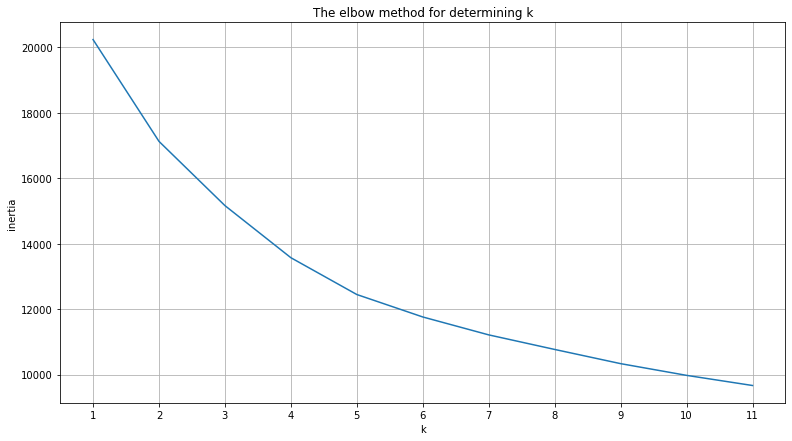

In [26]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1_train)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

[Text(0, 0.5, 'Time to travel distance'), Text(0.5, 0, 'Distance traveled')]

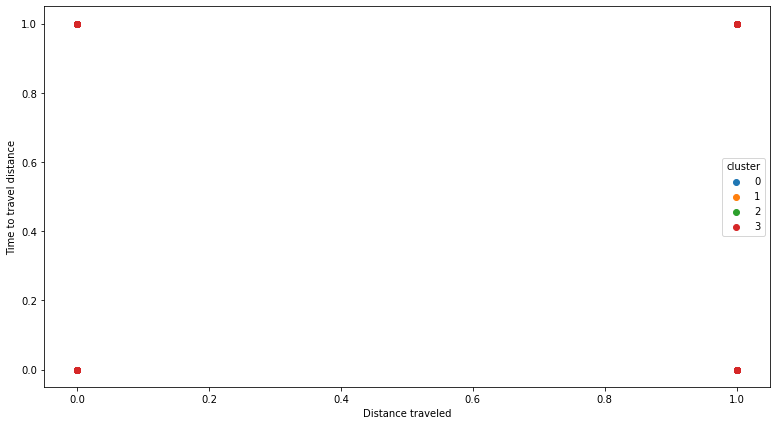

In [27]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('pos_att_cluster'):
    ax.scatter(subset.is_defense, subset.pass_stopped, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Time to travel distance', xlabel='Distance traveled')

In [28]:
X_train_scaled.head()

,x,y,s,a,dis,o,dir,playDirection,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y,pos_att_cluster
82272,0.30,0.33,0.32,0.04,0.12,0.11,0.11,1.00,0.57,0.20,0.19,0.06,0.26,0.00,0.00,0.00,0.00,0.23,0.97,0.60,0.44,1.00,0.64,0.55,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2
108303,0.44,0.43,0.06,0.27,0.03,0.96,0.57,0.00,0.79,0.46,0.43,0.09,0.06,1.00,0.00,0.25,0.67,0.23,0.45,0.50,0.67,0.00,0.53,0.50,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.58,0.33,2
173805,0.52,0.13,0.10,0.14,0.04,0.91,0.69,1.00,0.64,0.24,0.24,0.07,0.08,1.00,0.00,0.25,0.67,0.25,0.10,0.50,0.33,1.00,0.64,0.55,0.25,0.25,0.60,0.50,0.50,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.51,0.73,2
30278,0.68,0.64,0.40,0.38,0.15,0.41,0.98,1.00,0.50,0.30,0.05,0.07,0.36,0.00,0.00,0.75,0.33,0.47,0.03,0.50,0.44,0.00,0.96,0.71,0.25,0.25,0.60,0.17,0.67,0.71,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.05,0.76,0.42,1
82080,0.56,0.49,0.11,0.18,0.04,0.00,0.47,0.00,0.64,0.45,0.19,0.06,0.11,0.00,1.00,0.00,0.33,0.15,0.03,0.50,0.44,0.00,0.63,0.62,0.25,0.25,0.60,0.33,0.67,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,0.67,0.33,1


In [29]:
X2_train = X_train_scaled[['x', 'y', 'dis', 'o', 'dir', 'playDirection', 'quarter', 'down',
                           'yardsToGo', 'numberOfPassRushers', 'QB_under_pressure']]
X2_val = X_validate_scaled[['x', 'y', 'dis', 'o', 'dir', 'playDirection', 'quarter', 'down',
                           'yardsToGo', 'numberOfPassRushers', 'QB_under_pressure']]
X2_test = X_test_scaled[['x', 'y', 'dis', 'o', 'dir', 'playDirection', 'quarter', 'down',
                           'yardsToGo', 'numberOfPassRushers', 'QB_under_pressure']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2_train)

KMeans(n_clusters=3)

In [30]:
pd.DataFrame(kmeans.cluster_centers_, columns=X2_train.columns)

,x,y,dis,o,dir,playDirection,quarter,down,yardsToGo,numberOfPassRushers,QB_under_pressure
0,0.53,0.51,0.13,0.48,0.41,-0.00,0.40,0.30,0.20,0.47,-0.00
1,0.46,0.51,0.13,0.53,0.59,1.00,0.40,0.30,0.20,0.47,-0.00
2,0.49,0.51,0.13,0.50,0.50,0.50,0.41,0.34,0.20,0.47,1.00


In [31]:
X_train_scaled['play_cluster'] = kmeans.predict(X2_train)
X_train['play_cluster'] = kmeans.predict(X2_train)
X_validate_scaled['play_cluster'] = kmeans.predict(X2_val)
X_validate['play_cluster'] = kmeans.predict(X2_val)
X_test_scaled['play_cluster'] = kmeans.predict(X2_test)
X_test['play_cluster'] = kmeans.predict(X2_test)

In [32]:
X_train.groupby('play_cluster').describe()

x                                                   y  \
                count  mean   std   min   25%   50%   75%    max    count   
play_cluster                                                                
0            42348.00 64.48 24.52 -0.76 45.59 62.09 82.80 123.46 42348.00   
1            42427.00 55.33 24.47 -2.73 37.06 57.65 74.22 120.59 42427.00   
2             9688.00 59.23 27.55 -3.13 39.25 58.90 77.97 122.51  9688.00   

                                                              s            \
              mean   std   min   25%   50%   75%   max    count mean  std   
play_cluster                                                                
0            26.62 12.52 -6.10 17.32 26.58 35.77 57.77 42348.00 3.92 2.14   
1            26.90 12.45 -2.18 17.90 26.90 36.07 58.69 42427.00 3.92 2.14   
2            26.83 15.06 -8.18 14.42 26.81 39.46 60.63  9688.00 3.87 2.08   

                                              a                                \
              min  25%  50%  75%   max    count mean  std  min  25%  50%  75%   
play_cluster                                                                    
0            0.01 2.17 3.88 5.51 10.91 42348.00 2.41 1.34 0.00 1.38 2.27 3.26   
1            0.01 2.18 3.91 5.51 10.87 42427.00 2.40 1.33 0.02 1.38 2.27 3.26   
2            0.02 2.18 3.84 5.43 10.30  9688.00 2.21 1.21 0.01 1.32 2.07 2.94   

                        dis                                           o  \
               max    count mean  std  min  25%  50%  75%  max    count   
play_cluster                                                              
0            10.46 42348.00 0.39 0.22 0.00 0.22 0.39 0.55 2.99 42348.00   
1            10.24 42427.00 0.39 0.22 0.00 0.22 0.39 0.55 1.63 42427.00   
2            12.52  9688.00 0.39 0.21 0.00 0.22 0.39 0.55 2.46  9688.00   

                                                                 dir         \
               mean    std  min    25%    50%    75%    max    count   mean   
play_cluster                                                                  
0            171.58 104.79 0.00  83.85 166.88 255.84 359.99 42348.00 147.37   
1            190.08 104.95 0.00 107.62 193.13 279.12 360.00 42427.00 213.03   
2            178.62 107.10 0.02  88.39 178.52 268.17 360.00  9688.00 179.22   

                                                     pass_stopped            \
                std  min    25%    50%    75%    max        count mean  std   
play_cluster                                                                  
0            100.62 0.00  65.39 137.31 201.26 359.99     42348.00 0.34 0.47   
1            101.07 0.00 159.06 223.54 295.96 360.00     42427.00 0.34 0.47   
2            108.50 0.01  88.47 178.53 270.36 359.99      9688.00 0.53 0.50   

                                      playDirection                           \
              min  25%  50%  75%  max         count mean  std  min  25%  50%   
play_cluster                                                                   
0            0.00 0.00 0.00 1.00 1.00      42348.00 0.00 0.00 0.00 0.00 0.00   
1            0.00 0.00 0.00 1.00 1.00      42427.00 1.00 0.00 1.00 1.00 1.00   
2            0.00 0.00 1.00 1.00 1.00       9688.00 0.50 0.50 0.00 0.00 0.00   

                         height                                           \
              75%  max    count  mean  std   min   25%   50%   75%   max   
play_cluster                                                               
0            0.00 0.00 42348.00 73.02 2.36 66.00 71.00 73.00 75.00 80.00   
1            1.00 1.00 42427.00 73.01 2.37 66.00 71.00 73.00 75.00 80.00   
2            1.00 1.00  9688.00 73.03 2.36 66.00 71.00 73.00 75.00 80.00   

               weight                                                  \
                count   mean   std    min    25%    50%    75%    max   
play_cluster                                                            
0            42348.00 216.13 23.53 159.00 196.00 

In [33]:
kmeans.inertia_

42008.994586609064

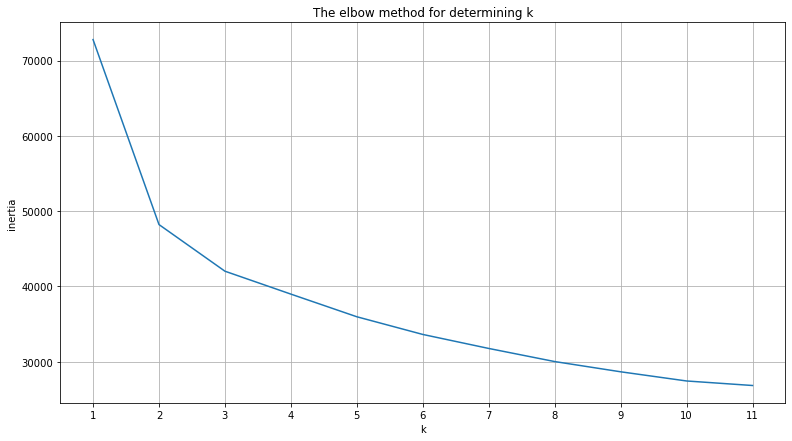

In [34]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2_train)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [35]:
X_train_scaled.head()

,x,y,s,a,dis,o,dir,playDirection,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y,pos_att_cluster,play_cluster
82272,0.30,0.33,0.32,0.04,0.12,0.11,0.11,1.00,0.57,0.20,0.19,0.06,0.26,0.00,0.00,0.00,0.00,0.23,0.97,0.60,0.44,1.00,0.64,0.55,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2,2
108303,0.44,0.43,0.06,0.27,0.03,0.96,0.57,0.00,0.79,0.46,0.43,0.09,0.06,1.00,0.00,0.25,0.67,0.23,0.45,0.50,0.67,0.00,0.53,0.50,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.58,0.33,2,0
173805,0.52,0.13,0.10,0.14,0.04,0.91,0.69,1.00,0.64,0.24,0.24,0.07,0.08,1.00,0.00,0.25,0.67,0.25,0.10,0.50,0.33,1.00,0.64,0.55,0.25,0.25,0.60,0.50,0.50,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.51,0.73,2,2
30278,0.68,0.64,0.40,0.38,0.15,0.41,0.98,1.00,0.50,0.30,0.05,0.07,0.36,0.00,0.00,0.75,0.33,0.47,0.03,0.50,0.44,0.00,0.96,0.71,0.25,0.25,0.60,0.17,0.67,0.71,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.05,0.76,0.42,1,1
82080,0.56,0.49,0.11,0.18,0.04,0.00,0.47,0.00,0.64,0.45,0.19,0.06,0.11,0.00,1.00,0.00,0.33,0.15,0.03,0.50,0.44,0.00,0.63,0.62,0.25,0.25,0.60,0.33,0.67,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,0.67,0.33,1,0


In [36]:
X3_train = X_train_scaled[['RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'I_FORM', 'JUMBO',
                           'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three', 'three_four',
                           'nickel', 'dime']]
X3_val = X_validate_scaled[['RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'I_FORM', 'JUMBO',
                           'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three', 'three_four',
                           'nickel', 'dime']]
X3_test = X_test_scaled[['RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'I_FORM', 'JUMBO',
                           'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three', 'three_four',
                           'nickel', 'dime']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X3_train)

KMeans(n_clusters=4)

In [37]:
pd.DataFrame(kmeans.cluster_centers_, columns=X3_train.columns).T

,0,1,2,3
RB,0.32,0.25,0.26,0.26
TE,0.46,0.25,0.26,0.28
WR,0.38,0.60,0.58,0.57
DL,0.64,0.45,0.54,0.56
LB,0.53,0.37,0.46,0.44
DB,0.43,0.72,0.57,0.58
I_FORM,0.24,0.00,-0.00,0.06
JUMBO,0.00,-0.00,-0.00,-0.00
PISTOL,0.02,0.01,0.00,0.04
SHOTGUN,0.26,0.82,1.00,-0.00


In [38]:
X_train_scaled['offvsdef_cluster'] = kmeans.predict(X3_train)
X_train['offvsdef_cluster'] = kmeans.predict(X3_train)
X_validate_scaled['offvsdef_cluster'] = kmeans.predict(X3_val)
X_validate['offvsdef_cluster'] = kmeans.predict(X3_val)
X_test_scaled['offvsdef_cluster'] = kmeans.predict(X3_test)
X_test['offvsdef_cluster'] = kmeans.predict(X3_test)

In [39]:
X_train.groupby('offvsdef_cluster').describe()

x                                                   y  \
                    count  mean   std   min   25%   50%   75%    max    count   
offvsdef_cluster                                                                
0                14027.00 59.60 25.00 -0.32 41.41 59.45 77.70 122.87 14027.00   
1                18714.00 59.81 24.54 -2.63 42.30 59.47 77.16 121.02 18714.00   
2                44364.00 60.01 25.35 -3.13 41.86 60.02 78.07 123.46 44364.00   
3                17358.00 59.60 25.71 -1.89 40.73 59.58 78.06 121.86 17358.00   

                                                                  s            \
                  mean   std   min   25%   50%   75%   max    count mean  std   
offvsdef_cluster                                                                
0                26.67 12.64 -6.10 17.23 26.67 35.81 56.88 14027.00 4.08 2.18   
1                26.71 12.81 -5.86 17.48 26.75 36.02 56.69 18714.00 3.83 2.12   
2                26.81 12.75 -5.45 17.33 26.81 36.27 60.63 44364.00 3.85 2.11   
3                26.80 12.89 -8.18 17.06 26.63 36.77 57.50 17358.00 4.02 2.17   

                                                  a                           \
                  min  25%  50%  75%   max    count mean  std  min  25%  50%   
offvsdef_cluster                                                               
0                0.01 2.33 4.13 5.70 10.87 14027.00 2.34 1.30 0.03 1.33 2.19   
1                0.01 2.08 3.80 5.41 10.30 18714.00 2.39 1.34 0.00 1.37 2.25   
2                0.01 2.13 3.82 5.41 10.91 44364.00 2.40 1.32 0.01 1.38 2.26   
3                0.01 2.28 4.04 5.63 10.54 17358.00 2.38 1.31 0.01 1.38 2.25   

                                 dis                                     \
                  75%   max    count mean  std  min  25%  50%  75%  max   
offvsdef_cluster                                                          
0                3.16  9.30 14027.00 0.41 0.22 0.00 0.24 0.41 0.57 1.65   
1                3.23 12.52 18714.00 0.39 0.22 0.00 0.21 0.38 0.54 2.99   
2                3.25 10.24 44364.00 0.39 0.21 0.00 0.21 0.38 0.54 2.12   
3                3.20 10.46 17358.00 0.41 0.22 0.00 0.23 0.41 0.57 1.07   

                        o                                                \
                    count   mean    std  min   25%    50%    75%    max   
offvsdef_cluster                                                          
0                14027.00 180.42 105.84 0.05 91.18 179.34 269.51 359.98   
1                18714.00 180.16 105.07 0.02 93.47 178.47 268.82 360.00   
2                44364.00 180.60 105.36 0.00 92.96 179.25 270.25 359.99   
3                17358.00 181.29 105.88 0.00 93.19 180.88 271.47 359.93   

                      dir                                                \
                    count   mean    std  min   25%    50%    75%    max   
offvsdef_cluster                                                          
0                14027.00 180.24 106.21 0.00 91.22 179.57 270.10 359.97   
1                18714.00 178.54 105.37 0.00 90.05 178.83 266.38 359.99   
2                44364.00 180.24 106.63 0.00 90.85 179.90 269.77 360.00   
3                17358.00 181.45 106.55 0.02 92.26 181.50 271.47 359.99   

                 pass_stopped                                     \
                        count mean  std  min  25%  50%  75%  max   
offvsdef_cluster                                                   
0                    14027.00 0.33 0.47 0.00 0.00 0.00 1.00 1.00   
1                    18714.00 0.39 0.49 0.00 0.00 0.00 1.00 1.00   
2                    44364.00 0.36 0.48 0.00 0.00 0.00 1.00 1.00   
3                    17358.00 0.36 0.48 0.00 0.00 0.00 1.00 1.00   

                 playDirection                                      height  \
                         count mean  std  min  25%  50%  75%  max    count   
offvsdef_cluster                                                             
0                     14027.00 0.50 0.

In [40]:
kmeans.inertia_

32178.17608273916

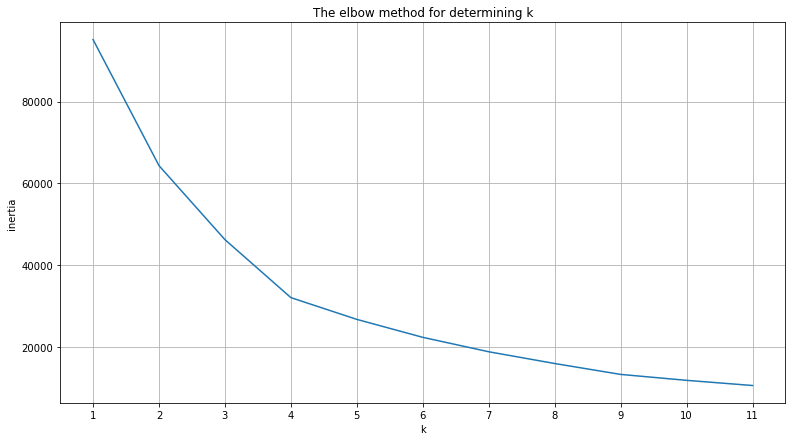

In [41]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3_train)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [42]:
X4_train = X_train_scaled[['QB_under_pressure', 'numberOfPassRushers', 'defendersInTheBox', 'force_per_second',
                           'time_since_last_x', 's', 'a']]
X4_val = X_validate_scaled[['QB_under_pressure', 'numberOfPassRushers', 'defendersInTheBox', 'force_per_second',
                           'time_since_last_x', 's', 'a']]
X4_test = X_test_scaled[['QB_under_pressure', 'numberOfPassRushers', 'defendersInTheBox', 'force_per_second',
                           'time_since_last_x', 's', 'a']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X4_train)

KMeans(n_clusters=3)

In [43]:
pd.DataFrame(kmeans.cluster_centers_, columns=X4_train.columns).T

,0,1,2
QB_under_pressure,-0.00,1.00,-0.00
numberOfPassRushers,0.47,0.47,0.47
defendersInTheBox,0.50,0.51,0.50
force_per_second,0.48,0.33,0.18
time_since_last_x,0.06,0.06,0.06
s,0.52,0.35,0.19
a,0.19,0.18,0.19


In [44]:
X_train_scaled['def_react_cluster'] = kmeans.predict(X4_train)
X_train['def_react_cluster'] = kmeans.predict(X4_train)
X_validate_scaled['def_react_cluster'] = kmeans.predict(X4_val)
X_validate['def_react_cluster'] = kmeans.predict(X4_val)
X_test_scaled['def_react_cluster'] = kmeans.predict(X4_test)
X_test['def_react_cluster'] = kmeans.predict(X4_test)

In [45]:
X_train.groupby('def_react_cluster').describe()

x                                             \
                     count  mean   std   min   25%   50%   75%    max   
def_react_cluster                                                       
0                 42333.00 60.00 24.57 -2.19 42.86 60.04 77.26 122.95   
1                  9688.00 59.23 27.55 -3.13 39.25 58.90 77.97 122.51   
2                 42442.00 59.81 25.27 -2.73 41.05 59.61 78.51 123.46   

                         y                                                  s  \
                     count  mean   std   min   25%   50%   75%   max    count   
def_react_cluster                                                               
0                 42333.00 26.68 13.13 -3.38 16.31 26.69 37.08 57.47 42333.00   
1                  9688.00 26.83 15.06 -8.18 14.42 26.81 39.46 60.63  9688.00   
2                 42442.00 26.84 11.81 -6.10 19.22 26.78 34.59 58.69 42442.00   

                                                             a                 \
                  mean  std  min  25%  50%  75%   max    count mean  std  min   
def_react_cluster                                                               
0                 5.70 1.25 3.34 4.70 5.51 6.52 10.91 42333.00 2.44 1.15 0.00   
1                 3.87 2.08 0.02 2.18 3.84 5.43 10.30  9688.00 2.21 1.21 0.01   
2                 2.13 1.10 0.01 1.23 2.18 3.08  4.30 42442.00 2.38 1.49 0.01   

                                            dis                                \
                   25%  50%  75%   max    count mean  std  min  25%  50%  75%   
def_react_cluster                                                               
0                 1.59 2.34 3.17 10.46 42333.00 0.57 0.13 0.00 0.47 0.55 0.66   
1                 1.32 2.07 2.94 12.52  9688.00 0.39 0.21 0.00 0.22 0.39 0.55   
2                 1.14 2.15 3.38  8.83 42442.00 0.21 0.11 0.00 0.12 0.22 0.31   

                              o                                                \
                   max    count   mean    std  min   25%    50%    75%    max   
def_react_cluster                                                               
0                 2.99 42333.00 180.52 106.18 0.00 92.81 179.17 269.16 360.00   
1                 2.46  9688.00 178.62 107.10 0.02 88.39 178.52 268.17 360.00   
2                 0.97 42442.00 181.15 104.37 0.00 93.52 180.10 271.09 359.98   

                       dir                                                \
                     count   mean    std  min   25%    50%    75%    max   
def_react_cluster                                                          
0                 42333.00 180.67 107.27 0.00 92.41 180.37 268.82 360.00   
1                  9688.00 179.22 108.50 0.01 88.47 178.53 270.36 359.99   
2                 42442.00 179.79 104.82 0.02 90.43 179.89 269.45 359.99   

                  pass_stopped                                     \
                         count mean  std  min  25%  50%  75%  max   
def_react_cluster                                                   
0                     42333.00 0.29 0.46 0.00 0.00 0.00 1.00 1.00   
1                      9688.00 0.53 0.50 0.00 0.00 1.00 1.00 1.00   
2                     42442.00 0.38 0.49 0.00 0.00 0.00 1.00 1.00   

                  playDirection                                      height  \
                          count mean  std  min  25%  50%  75%  max    count   
def_react_cluster                                                             
0                      42333.00 0.50 0.50 0.00 0.00 1.00 1.00 1.00 42333.00   
1                       9688.00 0.50 0.50 0.00 0.00 0.00 1.00 1.00  9688.00   
2                      42442.00 0.50 0.50 0.00 0.00 0.00 1.00 1.00 42442.00   

                                                             weight         \
                   mean  std   min   25%   50%   75%   max    count   mean   
def_react_cluster                                                            
0                 72.83 2.26 66.00 71.00 73.00 74.00 80.0

In [46]:
kmeans.inertia_

5266.797116352843

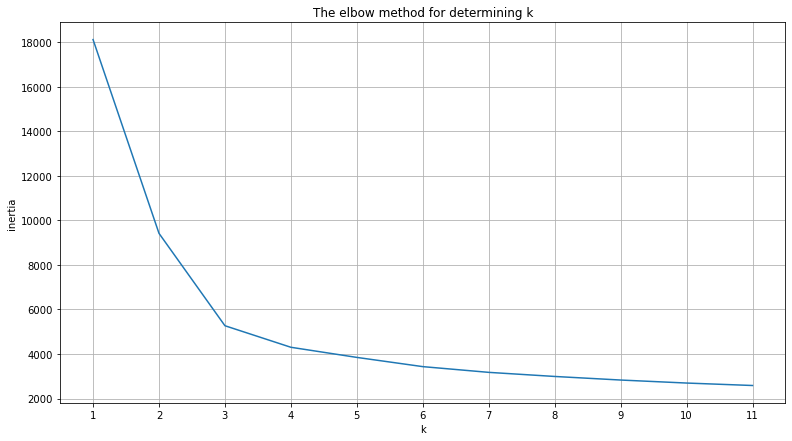

In [47]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X4_train)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [48]:
X_train_scaled.head()

,x,y,s,a,dis,o,dir,playDirection,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,RB,TE,WR,DL,LB,DB,EMPTY_x,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,closest_dist,closest_x,closest_y,pos_att_cluster,play_cluster,offvsdef_cluster,def_react_cluster
82272,0.30,0.33,0.32,0.04,0.12,0.11,0.11,1.00,0.57,0.20,0.19,0.06,0.26,0.00,0.00,0.00,0.00,0.23,0.97,0.60,0.44,1.00,0.64,0.55,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2,2,3,1
108303,0.44,0.43,0.06,0.27,0.03,0.96,0.57,0.00,0.79,0.46,0.43,0.09,0.06,1.00,0.00,0.25,0.67,0.23,0.45,0.50,0.67,0.00,0.53,0.50,0.25,0.25,0.60,0.67,0.33,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.58,0.33,2,0,2,2
173805,0.52,0.13,0.10,0.14,0.04,0.91,0.69,1.00,0.64,0.24,0.24,0.07,0.08,1.00,0.00,0.25,0.67,0.25,0.10,0.50,0.33,1.00,0.64,0.55,0.25,0.25,0.60,0.50,0.50,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0.51,0.73,2,2,2,1
30278,0.68,0.64,0.40,0.38,0.15,0.41,0.98,1.00,0.50,0.30,0.05,0.07,0.36,0.00,0.00,0.75,0.33,0.47,0.03,0.50,0.44,0.00,0.96,0.71,0.25,0.25,0.60,0.17,0.67,0.71,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.05,0.76,0.42,1,1,1,0
82080,0.56,0.49,0.11,0.18,0.04,0.00,0.47,0.00,0.64,0.45,0.19,0.06,0.11,0.00,1.00,0.00,0.33,0.15,0.03,0.50,0.44,0.00,0.63,0.62,0.25,0.25,0.60,0.33,0.67,0.57,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,0.67,0.33,1,0,2,2


In [49]:
X_train_scaled.columns

Index(['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'playDirection', 'height',
       'weight', 'age', 'time_since_last_x', 'force_per_second', 'is_home',
       'is_defense', 'quarter', 'down', 'yardsToGo', 'team_by_comp_yds',
       'defendersInTheBox', 'numberOfPassRushers', 'QB_under_pressure',
       'absoluteYardlineNumber', 'epa', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB',
       'EMPTY_x', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK',
       'WILDCAT', 'four_three', 'three_four', 'nickel', 'dime', 'closest_dist',
       'closest_x', 'closest_y', 'pos_att_cluster', 'play_cluster',
       'offvsdef_cluster', 'def_react_cluster'],
      dtype='object')

In [50]:
 X_train_scaled = X_train_scaled[['epa', 'time_since_last_x', 'x', 'a', 'yardsToGo', 'down',
                                  'absoluteYardlineNumber', 's', 'y', 'force_per_second',
                                  'QB_under_pressure', 'closest_dist', 'closest_x', 'closest_y']]
X_validate_scaled = X_validate_scaled[['epa', 'time_since_last_x', 'x', 'a', 'yardsToGo', 'down',
                                  'absoluteYardlineNumber', 's', 'y', 'force_per_second',
                                  'QB_under_pressure', 'closest_dist', 'closest_x', 'closest_y']]
X_test_scaled = X_test_scaled[['epa', 'time_since_last_x', 'x', 'a', 'yardsToGo', 'down',
                                  'absoluteYardlineNumber', 's', 'y', 'force_per_second',
                                  'QB_under_pressure', 'closest_dist', 'closest_x', 'closest_y']] 

In [51]:

# Import the functions I will need for modeling
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestClassifier
import wrangle_plays_data
import prep_plays
import pandas as pd
import numpy as np

def MVP():
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)
    
    print('---------------------------- Train -------------------------------')
    
    # fit train data
    rf.fit(X_train_scaled, y_train)
    # assign predicitons
    y_pred = rf.predict(X_train_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_train_scaled)
    print('Accuracy of random forest classifier on training set: {:.2f}'
         .format(rf.score(X_train_scaled, y_train)))
    print('Training Data Matrix')
    print(confusion_matrix(y_train, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_train, y_pred))
    
    print('---------------------------- Validate -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_validate_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_validate_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_validate_scaled, y_validate)))
    print('Validate Data Matrix')
    print(confusion_matrix(y_validate, y_pred))
    # print report
    print('Validate Data Report')
    print(classification_report(y_validate, y_pred))
    
    print('---------------------------- Test -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_test_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_test_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_test_scaled, y_test)))
    print('Test Data Matrix')
    print(confusion_matrix(y_test, y_pred))
    # print report
    print('Test Data Report')
    print(classification_report(y_test, y_pred))
    
    print('--------------------- Important Features ---------------------------')
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    return MVP, feature_importances



Wrangle.py Loaded Successfully


In [52]:
MVP()

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.95
Training Data Matrix
[[57825  2823]
 [ 1951 31864]]
Training Data Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     60648
           1       0.92      0.94      0.93     33815

    accuracy                           0.95     94463
   macro avg       0.94      0.95      0.95     94463
weighted avg       0.95      0.95      0.95     94463

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.93
Validate Data Matrix
[[37713  2720]
 [ 1833 20710]]
Validate Data Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     40433
           1       0.88      0.92      0.90     22543

    accuracy                           0.93     62976
   macro avg       0.92      0.93      0.92     62976


(<function __main__.MVP()>,
                         importance
 epa                           0.63
 closest_dist                  0.15
 closest_x                     0.04
 time_since_last_x             0.03
 closest_y                     0.03
 down                          0.02
 yardsToGo                     0.02
 x                             0.02
 a                             0.01
 absoluteYardlineNumber        0.01
 s                             0.01
 force_per_second              0.01
 y                             0.01
 QB_under_pressure             0.01)